# WORK IN PROGRESS

## PDF figure creation

The objective of this notebook is to create all graphs to generate a figure that allows you to look at your datas. 
In this, we want to create functions to create the plots (based on Step-by-Step-Processing), and then to generate an full figure. 
Then, we want to create a PDF that contains the figure. Each page on the PDF should be one session. 

In [6]:
# Imports

import os
import pickle

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.path as mpath

from matplotlib.colors import Normalize
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.gridspec import GridSpec, GridSpecFromSubplotSpec
from processing_TowerCoordinates import *

In [7]:
# Take one mouse as an example

path_to_data_folder = '/home/david/MyLocalData/Maud/' # Maud work computer
path_to_data_folder = 'C:/Users/mauds/Documents' # Maud personal computer
pattern_of_MOU_Folders = os.path.join(path_to_data_folder, "MOU*")

mice_list: list[str] = ["MOU4521"]

session_list = {}
for mouse in mice_list:
    mouse_folder = os.path.join(path_to_data_folder,mouse)
    session_list[mouse] = sorted([name for name in os.listdir(mouse_folder)
                           if os.path.isdir(os.path.join(mouse_folder, name))
                           and name.startswith('MOU')])
    nb_sessions = len(session_list[mouse])
    print(f'Hello, I\'m {mouse}! I have foraged for {nb_sessions} sessions')
    # print(session_list[mouse], '\n')

Hello, I'm MOU4521! I have foraged for 47 sessions


In [8]:
folder_path_mouse_to_process=os.path.join(path_to_data_folder,mice_list[0])
print(folder_path_mouse_to_process)

session_to_process=session_list[mice_list[0]][0]
print(session_to_process)

C:/Users/mauds/Documents\MOU4521
MOU4521_20240430-1143


In [9]:
# Import the pickle file

# Chemin complet vers le fichier pickle
output_pickle_filepath = f"{folder_path_mouse_to_process}/{session_to_process}/{session_to_process}_basic_processing_output.pickle"

# Ouvrir et charger le fichier pickle
with open(output_pickle_filepath, 'rb') as f:
    data = pickle.load(f)

# Afficher les clés du dictionnaire (pickle)
for key, value in data.items():
    print(key)


timeofframes
positions
distances
speeds
angular_speeds
distance_ran
average_speed
all_epochs
run_around_tower_sessionresult
all_trapezes_coordinates_cm
towers_coordinates_cm


In [31]:
# Create some variables from the pickle and calculate total distance ran

X_positions_cm = data['positions'][0]
Y_positions_cm = data['positions'][1]
average_speed = data['average_speed']
distances = data['distances']
speeds = data['speeds']
angular_speeds = data['angular_speeds']
all_epochs = data['all_epochs']
traject_time = data['timeofframes']
run_around_tower_results = data['run_around_tower_sessionresult']
timeofframes = data['timeofframes']
runs_around_tower = all_epochs['run_around_tower']
trapezes_coordinates = data['all_trapezes_coordinates_cm']
towers_coordinates = data['towers_coordinates_cm']


total_distance = np.sum(distances)/100 # Calculate total distance in meters

{'NW': {'N': [[19.28, 71.76], [32.08, 71.76], [41.35, 81.03], [10.01, 81.03]], 'E': [[32.08, 71.76], [32.08, 57.67], [41.35, 48.4], [41.35, 81.03]], 'S': [[32.08, 57.67], [19.28, 57.67], [10.01, 48.4], [41.35, 48.4]], 'W': [[19.28, 57.67], [19.28, 71.76], [10.01, 81.03], [10.01, 48.4]]}, 'NE': {'N': [[61.19, 72.69], [74.17, 72.69], [83.44, 81.96], [51.92, 81.96]], 'E': [[74.17, 72.69], [74.17, 57.85], [83.44, 48.58], [83.44, 81.96]], 'S': [[74.17, 57.85], [61.19, 57.85], [51.92, 48.58], [83.44, 48.58]], 'W': [[61.19, 57.85], [61.19, 72.69], [51.92, 81.96], [51.92, 48.58]]}, 'SW': {'N': [[20.21, 29.85], [33.56, 29.85], [42.83, 39.13], [10.94, 39.13]], 'E': [[33.56, 29.85], [33.56, 18.91], [42.83, 9.64], [42.83, 39.13]], 'S': [[33.56, 18.91], [20.21, 18.91], [10.94, 9.64], [42.83, 9.64]], 'W': [[20.21, 18.91], [20.21, 29.85], [10.94, 39.13], [10.94, 9.64]]}, 'SE': {'N': [[61.19, 30.04], [74.17, 30.04], [83.44, 39.31], [51.92, 39.31]], 'E': [[74.17, 30.04], [74.17, 18.91], [83.44, 9.64], 

In [11]:
# Check how positions datas are organized in the pickle
# Can be deleted once finished

print(f"X positions : {data['positions'][0]}") # X positions
print(f"Y positions : {data['positions'][1]}") # Y positions
print(f"Total distance ran = {round(total_distance,2)}m")


X positions : [ 6.80953875  6.94743006  7.07957129 ... 76.89789047 76.94278417
 76.95277095]
Y positions : [65.62991411 65.09054403 64.35077264 ... 22.25252706 22.25168045
 22.25165563]
Total distance ran = 151.6m


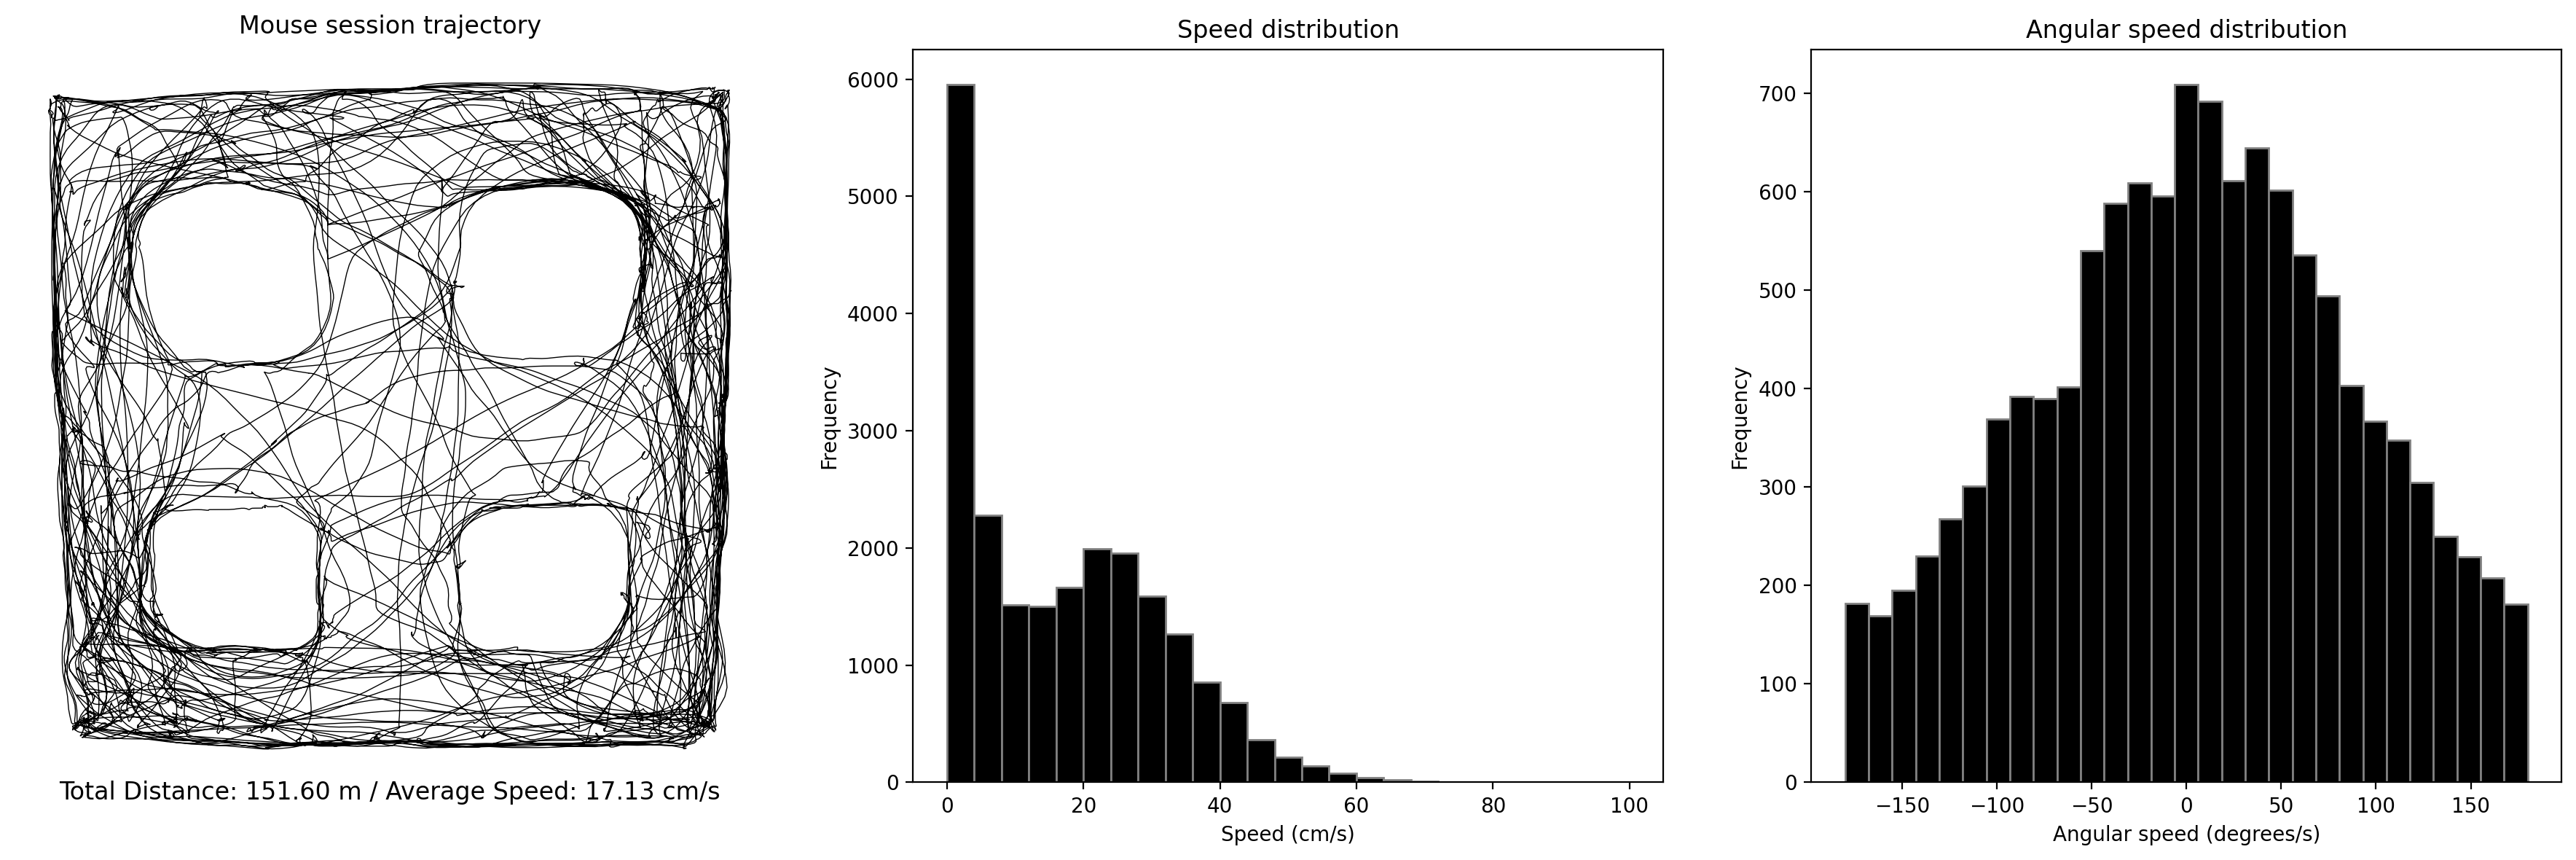

In [12]:
# Functions to plot trajectory, speeds distribution and angular speeds distribution

def plot_trajectory(ax, X_positions_cm, Y_positions_cm, total_distance, average_speed):
    """
    Trace la trajectoire de la souris sur l'axe donné avec la distance totale et la vitesse moyenne.
    """
    ax.plot(X_positions_cm, Y_positions_cm, color='black', linewidth=0.5)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.set_title('Mouse session trajectory', pad=8)
    
    # Ajout de la distance totale et de la vitesse moyenne sur le graphique
    text = f"Total Distance: {total_distance:.2f} m / Average Speed: {average_speed:.2f} cm/s"
    ax.text(0.5, -0.03, text, ha='center', va='bottom', transform=ax.transAxes, fontsize=12)

def plot_speed_distribution(ax, speeds):
    """
    Trace l'histogramme de distribution de la vitesse sur l'axe donné.
    """
    bins_speed = np.arange(0, 104, 4)  # Paliers de 4 cm/s jusqu'à 100 cm/s
    ax.hist(speeds, bins=bins_speed, edgecolor='gray', color='k')
    ax.set_title('Speed distribution')
    ax.set_xlabel('Speed (cm/s)')
    ax.set_ylabel('Frequency')

def plot_angular_speed_distribution(ax, angular_speeds):
    """
    Trace l'histogramme de distribution de la vitesse angulaire sur l'axe donné.
    """
    bins_angular_speed = np.linspace(-180, 180, 30)  # Paliers pour les vitesses angulaires
    ax.hist(angular_speeds, bins=bins_angular_speed, edgecolor='gray', color='k')
    ax.set_title('Angular speed distribution')
    ax.set_xlabel('Angular speed (degrees/s)')
    ax.set_ylabel('Frequency')

# Création d'une figure principale avec trois sous-graphiques (subplots)
fig, axs = plt.subplots(1, 3, figsize=(18, 6), dpi=200)

# Appel de chaque fonction en passant l'axe correspondant
plot_trajectory(axs[0], X_positions_cm, Y_positions_cm, total_distance, average_speed)
plot_speed_distribution(axs[1], speeds)
plot_angular_speed_distribution(axs[2], angular_speeds)

# Ajustement de la disposition
plt.tight_layout()
plt.show()


In [13]:
# Calculate time and distances spent in zones
# TO DO : should go in the processing of trajectory + add the 2 values returned in the pickle

border_zone = [
    [(3, 3), (10, 3), (10, 90), (3, 90)],  # left
    [(3, 3), (3, 9.5), (92, 9.5), (92, 3)],  # down
    [(84, 3), (92, 3), (92, 90), (84, 90)],  # right
    [(3, 83), (3, 90), (92, 90), (92, 83)]   # up
]

def calculate_time_distance_in_zones(folder_path_mouse_to_process, session_to_process, border_zone, trapeze_width, time_start=None, time_end=None):
    """This function is used to calculate the total time spent and total distance traveled in border, inner and trapezes areas during session. 
    Arguments:
    - folder_path_mouse_to_process
    - session_to_process
    - border_zone : dictionnary of coordinates that define the border zone
    - towers_coordinates : dictionnary of towers coordinates in pixel
    - trapeze_width : value in pixel to set up the size of the trapezes

    Outputs: 
    - time_spent_in_zones : dictionnary with area as key and time spent inside as value
    - distance_covered_in_zones : dictionnary with area as key and distance traveled inside as value
    """

    # Build the path to the session pickle file
    pickle_file = os.path.join(folder_path_mouse_to_process, session_to_process, session_to_process + '_basic_processing_output.pickle')
    
    towers_coordinates=get_trapeze_and_tower_data(folder_path_mouse_to_process, session_to_process)[1]
    
    # Load data from pickle file
    with open(pickle_file, 'rb') as f:
        session_data = pickle.load(f)
    
    # Extract the necessary data from the pickle in the selected period
    traject_time = session_data['timeofframes'] # replace here
    smoothed_Xpositions_cm = session_data['positions'][0] # replace here
    smoothed_Ypositions_cm = session_data['positions'][1] # replace here
    all_trapezes_coordinates_cm = generate_trapeze_and_tower_coordinates(towers_coordinates, trapeze_width)[0]

    # If None, the entire session will be analyzed
    if time_start is None:
        time_start = traject_time[0]
    if time_end is None:
        time_end = traject_time[-1]

    # Find the indices corresponding to the specified time interval
    start_idx = np.searchsorted(traject_time, time_start)
    end_idx = np.searchsorted(traject_time, time_end)

    # Extract data from the selected period
    selected_Xpositions = smoothed_Xpositions_cm[start_idx:end_idx]
    selected_Ypositions = smoothed_Ypositions_cm[start_idx:end_idx]
    selected_time = traject_time[start_idx:end_idx]

    # Border zones (red)
    border_polygons = [
        mpath.Path(border_zone[0]),  # Left
        mpath.Path(border_zone[1]),  # Down
        mpath.Path(border_zone[2]),  # Right
        mpath.Path(border_zone[3])   # Up
    ]
    
    # Trapezes zones (white)
    trapeze_polygons = []
    for tower, trapezes in all_trapezes_coordinates_cm.items():
        for trapeze, coords in trapezes.items():
            trapeze_polygons.append(mpath.Path(coords))
    
    # Interior zone (green)
    inner_setup_size = (10, 9.5, 84, 83)
    interior_polygon = mpath.Path([
        (inner_setup_size[0], inner_setup_size[1]),
        (inner_setup_size[0], inner_setup_size[3]),
        (inner_setup_size[2], inner_setup_size[3]),
        (inner_setup_size[2], inner_setup_size[1])
    ])
    
    # Variables to store time/distance spent in each zone
    time_in_border = 0
    time_in_trapeze = 0
    time_in_interior = 0
    distance_in_border = 0
    distance_in_trapeze = 0
    distance_in_interior = 0
    
    # Browse the trajectory positions and calculate the time and distance in each area
    for i in range(len(selected_Xpositions) - 1):
        point_start = np.array([selected_Xpositions[i], selected_Ypositions[i]])
        point_end = np.array([selected_Xpositions[i+1], selected_Ypositions[i+1]])

        # Calculate the time interval between each point
        dt = selected_time[i+1] - selected_time[i]
        
        # Calculate the distance between two successive points
        distance = np.linalg.norm(point_end - point_start)

        # Test if the initial point is in the 'border' zone (red)
        if any(polygon.contains_point(point_start) for polygon in border_polygons):
            time_in_border += dt
            distance_in_border += distance

        # Test if the initial point is in the 'trapeze' (white) area
        elif any(polygon.contains_point(point_start) for polygon in trapeze_polygons):
            time_in_trapeze += dt
            distance_in_trapeze += distance

        # Test if the initial point is in the inner (green) zone
        elif interior_polygon.contains_point(point_start):
            time_in_interior += dt
            distance_in_interior += distance

    # Return results in a dictionary, rounded to 2 decimal
    time_spent_in_zones = {
        'border': round(time_in_border, 2),
        'trapeze': round(time_in_trapeze, 2),
        'interior': round(time_in_interior, 2)
    }

    distance_covered_in_zones = {
        'border': round(distance_in_border, 2),
        'trapeze': round(distance_in_trapeze, 2),
        'interior': round(distance_in_interior, 2)
    }
    
    return time_spent_in_zones, distance_covered_in_zones

In [14]:
# Example usage of the function above

# Calculate the time spent in each zone
time_spent_in_zones, distance_covered_in_zones = calculate_time_distance_in_zones(folder_path_mouse_to_process, session_to_process, border_zone, trapeze_width=40, time_start=None, time_end=None)

time_in_border = time_spent_in_zones['border']
time_in_trapeze = time_spent_in_zones['trapeze']
time_in_interior = time_spent_in_zones['interior']
distance_in_border = distance_covered_in_zones['border']
distance_in_trapeze = distance_covered_in_zones['trapeze']
distance_in_interior = distance_covered_in_zones['interior']
# These variables should go at the begining once the function is added to the pickle generation


In [15]:
# Calculate the time and distance ratios between trapeze and border
# TO DO : go up once function pickled

ratio_time_trapeze_border = time_in_trapeze / time_in_border
ratio_distance_trapeze_border = distance_in_trapeze / distance_in_border

# Calculate speed for each zone
speed_border = distance_in_border / time_in_border
speed_trapezes = distance_in_trapeze / time_in_trapeze
speed_interior = distance_in_interior / time_in_interior

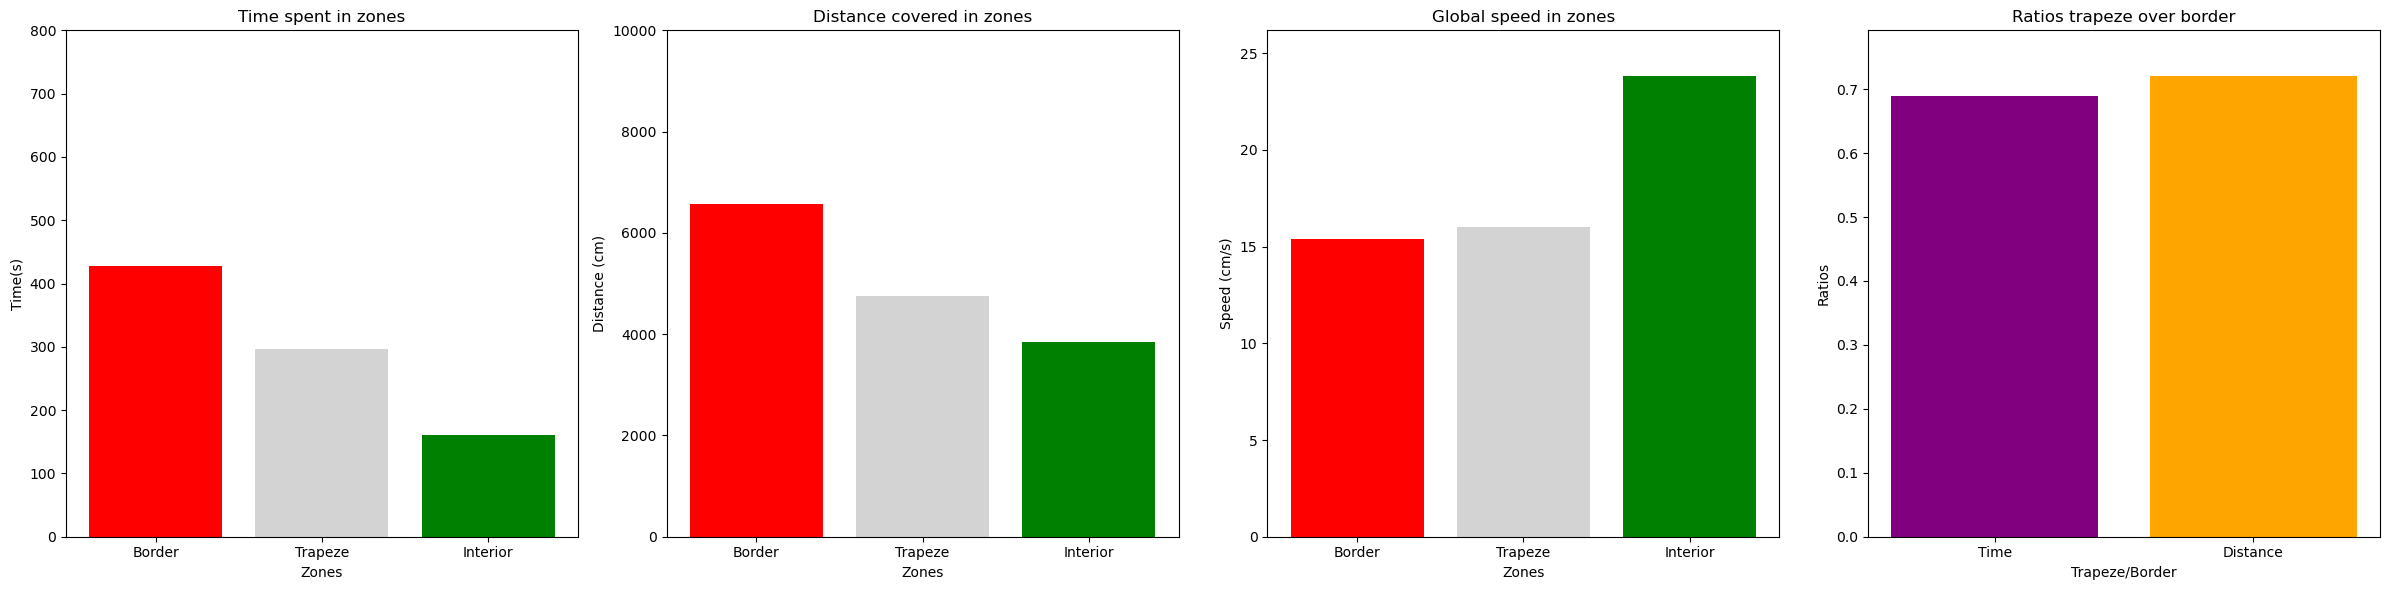

In [17]:
# Function to plot metrics in different zones

def plot_metrics_in_zones(ax, metrics_data, metric_title='Undefined metric', ylabel = 'Undefined y label', ymax=None):
    """
    Crée une figure avec plusieurs sous-graphiques pour afficher différentes métriques
    (temps, distance, vitesse et ratios) dans chaque zone.
    
TO REDO BECAUSE NOT ACCURATE 

    Paramètres :
        fig : La figure sur laquelle ajouter les sous-graphiques.
        zones (list) : Liste des zones.
        time_data (list) : Liste des temps passés dans chaque zone.
        distance_data (list) : Liste des distances parcourues dans chaque zone.
        speed_data (list) : Liste des vitesses moyennes dans chaque zone.
        ratios_columns_titles (list) : Liste des titres des ratios ('Time', 'Distance').
        ratios_trapeze_over_border (list) : Valeurs des ratios trapèze/bordure.
        colors_zones (list) : Liste des couleurs associées à chaque zone.
        colors_ratios (list) : Liste des couleurs associées aux ratios.
    """

    # For time data : ymax = 900
    # For distance data: ymax= 10000

    # Tracer la métrique choisie en fonction de la zone
    ax.bar(['Border', 'Trapeze', 'Interior'], metrics_data, color=['red', 'lightgray', 'green'])
    ax.set_title(metric_title)
    ax.set_xlabel('Zones')
    ax.set_ylabel(ylabel)
    if ymax == None:
        ax.set_ylim(0,max(metrics_data)*1.1)
    else:
        ax.set_ylim(0, ymax)

    # Ajuster l'espacement entre les sous-graphiques
    # plt.tight_layout()
    # plt.show()

def plot_ratios_in_zones(ax, ratios_data, title_ratio = 'Undefined title', xlabel = 'Undefined label', ymax=None):
    
    # Tracer les ratios trapèze/bordure pour le temps et la distance
    ax.bar(['Time', 'Distance'], ratios_data, color=['purple', 'orange'])
    ax.set_title(title_ratio)
    ax.set_xlabel(xlabel)
    ax.set_ylabel('Ratios')
    if ymax == None:
        ax.set_ylim(0,max(ratios_data)*1.1)
    else:
        ax.set_ylim(0, ymax)

# Datas to plot
time_zones_data = [time_in_border, time_in_trapeze, time_in_interior]
distance_zones_data = [distance_in_border, distance_in_trapeze, distance_in_interior]
speed_zones_data = [speed_border, speed_trapezes, speed_interior]
ratios_trapeze_over_border = [round(ratio_time_trapeze_border, 2), round(ratio_distance_trapeze_border, 2)]

# Création de la figure
fig, axs = plt.subplots(1, 4, figsize=(24, 6))

# Appel de la fonction pour créer la figure avec les sous-graphiques
plot_metrics_in_zones(axs[0], time_zones_data, metric_title='Time spent in zones', ylabel = 'Time(s)', ymax=800)
plot_metrics_in_zones(axs[1], distance_zones_data, metric_title='Distance covered in zones', ylabel = 'Distance (cm)', ymax=10000)
plot_metrics_in_zones(axs[2], speed_zones_data, metric_title='Global speed in zones', ylabel = 'Speed (cm/s)', ymax=None)
plot_ratios_in_zones(axs[3], ratios_trapeze_over_border, title_ratio='Ratios trapeze over border', xlabel = 'Trapeze/Border', ymax=None)

plt.tight_layout()
plt.show()

### Plot QT related graphs

In [18]:
# Create a color map for further analysis

def custom_cmap(num_points):
    colors = [(0, 1, 0), (1, 0.5, 0), (1, 0, 0)] # Green to orange to red
    cmap = LinearSegmentedColormap.from_list('custom_cmap', colors)
    return [cmap(i / (num_points - 1)) for i in range(num_points)]


In [19]:
# Extract CW and CCW info from pickle here 

all_results_CW_CCW = run_around_tower_results['All']

# Extraire les valeurs spécifiques
total_CW = all_results_CW_CCW['total_CW']
total_CCW = all_results_CW_CCW['total_CCW']
rewarded_CW = all_results_CW_CCW['rewarded_CW']
rewarded_CCW = all_results_CW_CCW['rewarded_CCW']

# Afficher les résultats
print("total_CW:", total_CW)
print("total_CCW:", total_CCW)
print("rewarded_CW:", rewarded_CW)
print("rewarded_CCW:", rewarded_CCW)


total_CW: 19
total_CCW: 12
rewarded_CW: 0
rewarded_CCW: 1


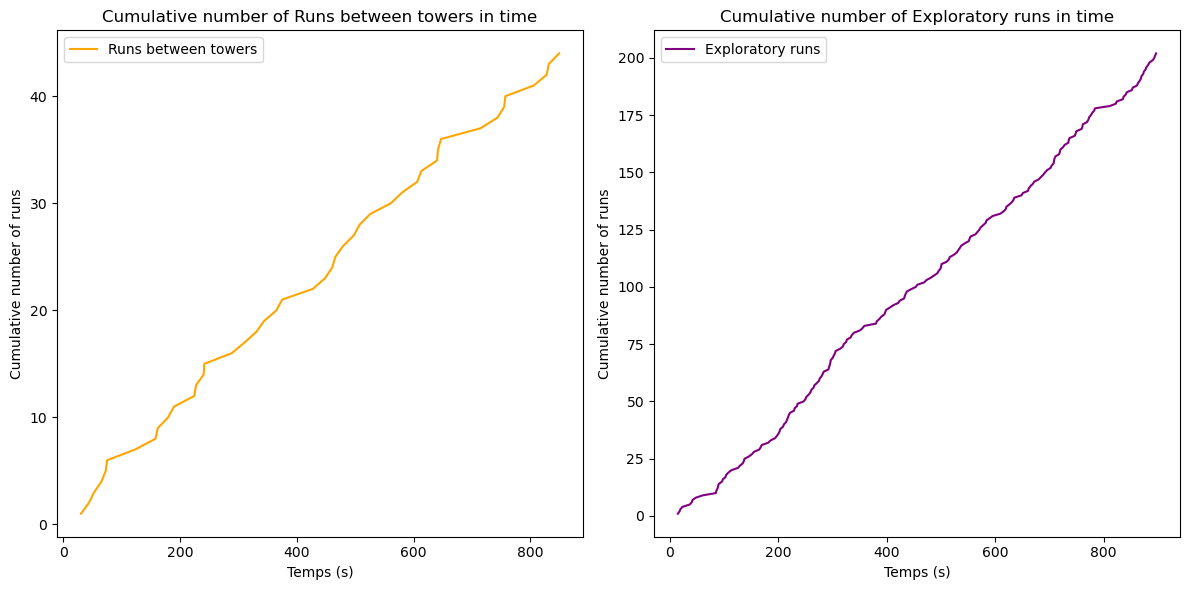

In [95]:
# Plot the cumulative number of run between towers and exploratory runs
# TO DO : transform into a function where you choose the run type again
# TO DO BONUS : create a cell at the begining of the code to define every variable

# Extraire les données des runs between towers et exploratory runs
runs_between_towers = data['all_epochs']['run_between_towers']
exploratory_runs = data['all_epochs']['exploratory_run']

def plot_cumulative_runs(ax, runs, legend_label='Run type', color='orange', ymax=None):

    # Time extraction
    run_times = np.sort(np.array([run[3]['time'] for run in runs]))

    # Cumulative count
    cumulative_count = np.arange(1, len(run_times)+1)

    # Tracé du graphique cumulatif 
    ax.plot(run_times, cumulative_count, label=legend_label, color=color)
    ax.set_xlabel('Temps (s)')
    ax.set_ylabel('Cumulative number of runs')
    ax.set_title(f'Cumulative number of {legend_label} in time')
    ax.legend()

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

plot_cumulative_runs(axs[0], runs_between_towers, legend_label='Runs between towers', color='orange', ymax=None)
plot_cumulative_runs(axs[1], exploratory_runs, legend_label='Exploratory runs', color='purple', ymax=None)

plt.tight_layout()
plt.show()

In [21]:
# Function to plot centered trajectory for a specific run type
# TO DO : incorporate direction for runs around tower

def plot_trajectory_type_centered(ax, smoothed_Xpositions, smoothed_Ypositions, run_type, title_type = 'run not defined', axis_lim=80, direction='None', q=4):
    """
    Trace la trajectoire de la souris pour le type de run spécifié.
    
    Paramètres :
        ax : Axe matplotlib sur lequel dessiner le graphique.
        smoothed_Xpositions (list) : Positions X lissées.
        smoothed_Ypositions (list) : Positions Y lissées.
        run_type (str) : Type de run ('run_between_towers', 'exploratory_run', 'run_around_tower').
        q (int) : Nombre de points pour calculer la flèche de direction.
    """
    # if run_type == 'run_around_tower' and direction is not None:
    #     runs = all_epochs[run_type]
    # runs = all_epochs[run_type]

    fixed_origin = (0, 0)
    cmap = plt.cm.copper
    norm = Normalize(vmin=0, vmax=len(run_type))

    for index, run in enumerate(run_type):
        start_index, end_index = run[0][0], run[0][1]

        # Extraction des positions X et Y pour cette période de run
        runtype_epoch_Xpositions = smoothed_Xpositions[start_index:end_index + 1]
        runtype_epoch_Ypositions = smoothed_Ypositions[start_index:end_index + 1]
        numberofpositions = len(runtype_epoch_Xpositions)
        colorgradientforthisrun = custom_cmap(numberofpositions)
        
        # Translation de la trajectoire pour que le point de départ soit à l'origine
        start_x, start_y = runtype_epoch_Xpositions[0], runtype_epoch_Ypositions[0]
        translated_Xpositions = [x - start_x + fixed_origin[0] for x in runtype_epoch_Xpositions]
        translated_Ypositions = [y - start_y + fixed_origin[1] for y in runtype_epoch_Ypositions]
        
        # Tracé de la trajectoire
        for i in range(numberofpositions - 1):
            ax.plot(translated_Xpositions[i:i+2], translated_Ypositions[i:i+2], color=colorgradientforthisrun[i])
        
        # Point de départ en vert
        ax.plot(translated_Xpositions[0], translated_Ypositions[0], 'go', markersize=3)
        
        # Tracé de la flèche directionnelle
        if len(translated_Xpositions) >= q:
            dx = translated_Xpositions[-1] - translated_Xpositions[-q]
            dy = translated_Ypositions[-1] - translated_Ypositions[-q]
            
            norm_speed = np.hypot(dx, dy)
            if norm_speed != 0:
                dx /= norm_speed
                dy /= norm_speed
            
            ax.arrow(translated_Xpositions[-1], translated_Ypositions[-1], dx, dy,
                     head_width=1, head_length=1, fc='red', ec='red')

    ax.set_ylabel('Y Position (cm)')
    ax.set_xlabel('X Position (cm)')
    ax.set_xlim(-axis_lim, axis_lim)
    ax.set_ylim(-axis_lim, axis_lim)

    ax.set_title(f"Trajectoire centrée pour {title_type}")


In [22]:
# Function to plot speed profile of a specific run type

def plot_speed_over_time(ax, traject_time, speeds, run_type, title_type = 'run not defined',xlim=5.1):
    """
    Trace la vitesse de la souris en fonction du temps pour le type de run spécifié.
    
    Paramètres :
        ax : Axe matplotlib sur lequel dessiner le graphique.
        traject_time (list) : Temps de la trajectoire.
        speeds (list) : Vitesse de la souris.
        runs (list) : Liste des runs pour le type spécifié.
        run_type (str) : Type de run ('between_towers', 'exploratory', 'around_tower').
        color_map (Colormap) : Colormap pour le gradient de couleur.
    """

    # runs = all_epochs[run_type]

    norm = Normalize(vmin=0, vmax=len(run_type))
    color_map = plt.cm.copper
    
    for index, run in enumerate(run_type):
        start_index, end_index = run[0][0], run[0][1]
        adjusted_time = [t - traject_time[start_index] for t in traject_time[start_index:end_index + 1]]
        
        # Tracé de la vitesse
        ax.plot(adjusted_time, speeds[start_index:end_index + 1], color=color_map(norm(index)))

    ax.set_ylabel('Speed (cm/s)')
    ax.set_xlabel('Time (s)')
    ax.set_ylim(0, 80)
    ax.set_xlim(0, xlim)
    
    ax.set_title(f"Vitesse en fonction du temps pour {title_type}")


In [23]:
runs_around_tower_CW = []
runs_around_tower_CCW = []
runs_around_tower_rewarded = []
runs_around_tower_unrewarded = []

for run in runs_around_tower:
    if run[3]['direction'] == 'CW':
        runs_around_tower_CW.append(run)
    else:
        runs_around_tower_CCW.append(run)

    if run[3]['Rewarded'] == True:
        runs_around_tower_rewarded.append(run)
    else:
        runs_around_tower_unrewarded.append(run)

print(runs_around_tower_CCW)
print(runs_around_tower_CW)
print(runs_around_tower_rewarded)
print(runs_around_tower_unrewarded)

# print(runs_around_tower[0][4]['epoch_time']) # Test, to delete later

[[[1400, 1440], ['NE', 'N'], ['NE', 'W'], {'Rewarded': False, 'direction': 'CCW', 'num_trapezeswitch': 1}, {'epoch_time': 71.048, 'epoch_duration': 1.6020000000000039, 'epoch_distance': 31.93127594575902, 'epoch_meanspeed': 19.932132300723435, 'epoch_maxspeed': 36.3387051581669}], [[3248, 3267], ['SE', 'W'], ['SE', 'S'], {'Rewarded': False, 'direction': 'CCW', 'num_trapezeswitch': 1}, {'epoch_time': 145.007, 'epoch_duration': 0.7609999999999957, 'epoch_distance': 9.138585092037879, 'epoch_meanspeed': 12.008653208985454, 'epoch_maxspeed': 23.292626858749145}], [[6233, 6248], ['NE', 'S'], ['NE', 'E'], {'Rewarded': False, 'direction': 'CCW', 'num_trapezeswitch': 1}, {'epoch_time': 264.472, 'epoch_duration': 0.6000000000000227, 'epoch_distance': 9.029157683886101, 'epoch_meanspeed': 15.048596139809598, 'epoch_maxspeed': 27.774742616693487}], [[7433, 7461], ['SW', 'E'], ['SW', 'N'], {'Rewarded': False, 'direction': 'CCW', 'num_trapezeswitch': 1}, {'epoch_time': 312.497, 'epoch_duration': 1.

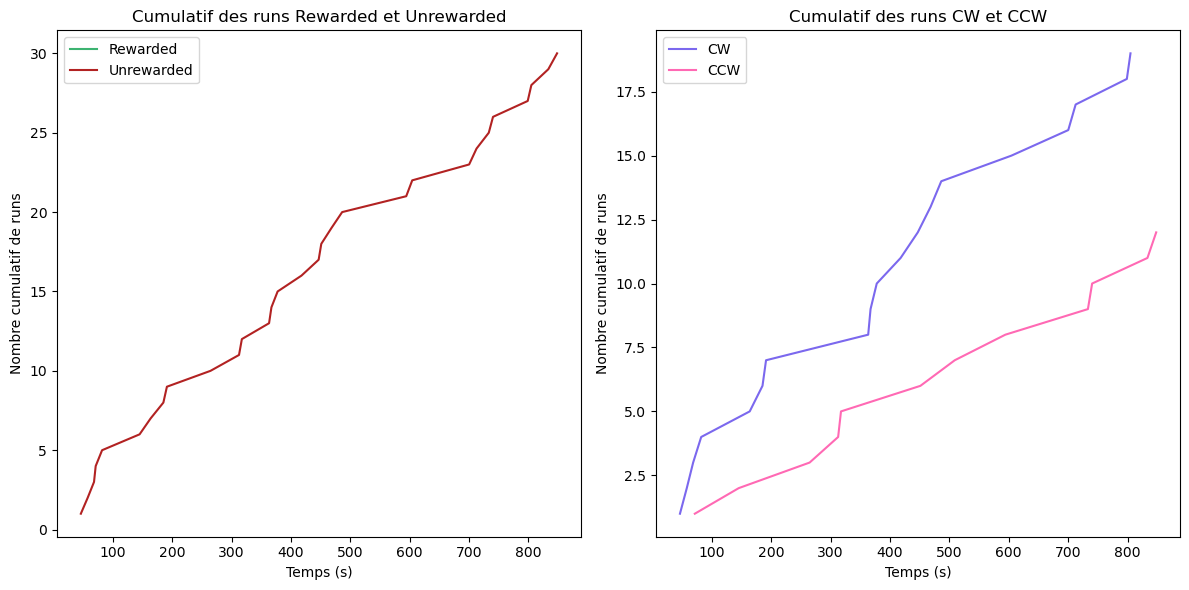

In [24]:
def plot_cumulative_rewarded_unrewarded(ax, runs_around_tower):

    # Create empty lists to store runs
    runs_around_tower_rewarded = []
    runs_around_tower_unrewarded = []

    for run in runs_around_tower:
        if run[3]['Rewarded'] == True:
            runs_around_tower_rewarded.append(run)
        else:
            runs_around_tower_unrewarded.append(run)

    # Extraire les temps des runs "rewarded" et "unrewarded" dans l'ordre croissant
    rewarded_times_sorted = np.sort(np.array([run[4]['epoch_time'] for run in runs_around_tower_rewarded]))
    unrewarded_times_sorted = np.sort(np.array([run[4]['epoch_time'] for run in runs_around_tower_unrewarded]))

    # Calculer les cumulés
    cumulative_rewarded = np.arange(1, len(rewarded_times_sorted) + 1)
    cumulative_unrewarded = np.arange(1, len(unrewarded_times_sorted) + 1)

    # Tracer les courbes cumulatives
    ax.plot(rewarded_times_sorted, cumulative_rewarded, label='Rewarded', color='mediumseagreen')
    ax.plot(unrewarded_times_sorted, cumulative_unrewarded, label='Unrewarded', color='firebrick')


    # Paramètres du graphique
    ax.set_xlabel('Temps (s)')
    ax.set_ylabel('Nombre cumulatif de runs')
    ax.set_title('Cumulatif des runs Rewarded et Unrewarded')
    ax.legend()

def plot_cumulative_CW_CCW(ax, runs_around_tower):
    # Create empty lists to store runs
    runs_around_tower_CW = []
    runs_around_tower_CCW = []

    for run in runs_around_tower:
        if run[3]['direction'] == 'CW':
            runs_around_tower_CW.append(run)
        else:
            runs_around_tower_CCW.append(run)

    # Extraire les temps des runs "CW" et "CW" dans l'ordre croissant
    CW_times_sorted = np.sort(np.array([run[4]['epoch_time'] for run in runs_around_tower_CW]))
    CCW_times_sorted = np.sort(np.array([run[4]['epoch_time'] for run in runs_around_tower_CCW]))

    # Calculer les cumulés
    cumulative_CW = np.arange(1, len(CW_times_sorted) + 1)
    cumulative_CCW = np.arange(1, len(CCW_times_sorted) + 1)

    # Tracer les courbes cumulatives
    ax.plot(CW_times_sorted, cumulative_CW, label='CW', color='mediumslateblue')
    ax.plot(CCW_times_sorted, cumulative_CCW, label='CCW', color='hotpink')


    # Paramètres du graphique
    ax.set_xlabel('Temps (s)')
    ax.set_ylabel('Nombre cumulatif de runs')
    ax.set_title('Cumulatif des runs CW et CCW')
    ax.legend()

# Exemple d'utilisation
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Tracer les données sur l'axe
plot_cumulative_rewarded_unrewarded(axs[0], runs_around_tower)
plot_cumulative_CW_CCW(axs[1], runs_around_tower)

# Ajustement de la disposition et affichage
plt.tight_layout()
plt.show()


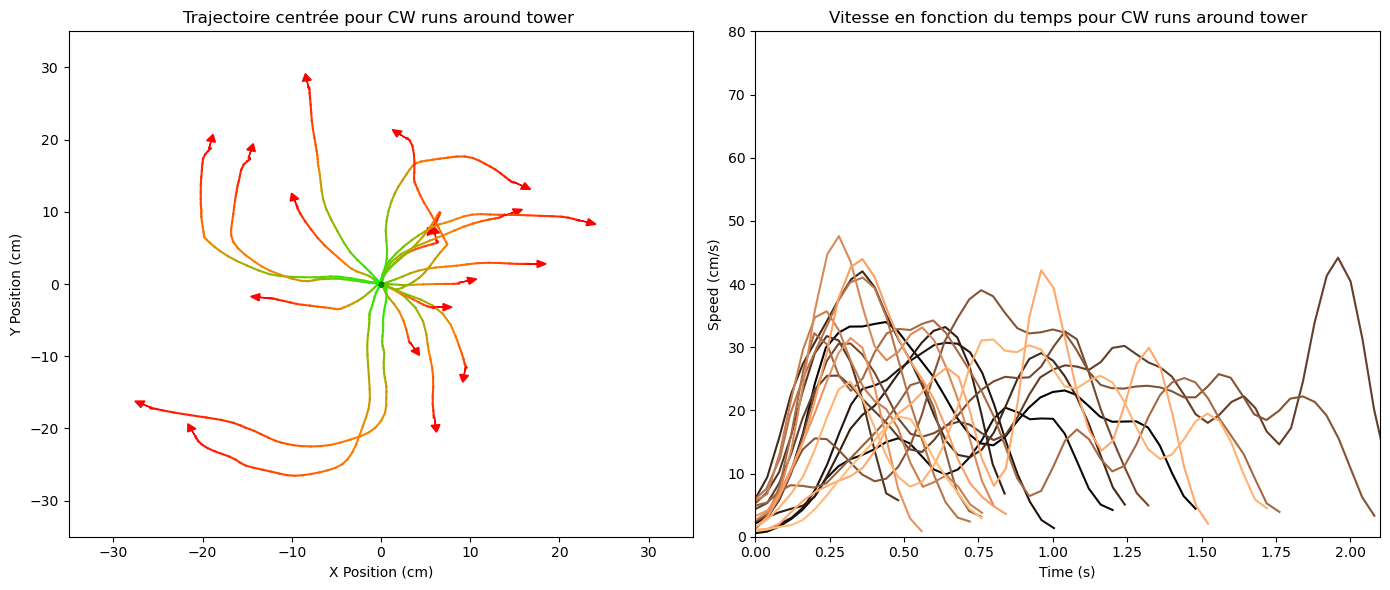

In [26]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

plot_trajectory_type_centered(axs[0], X_positions_cm, Y_positions_cm, runs_around_tower_CW, title_type='CW runs around tower ', axis_lim=35)
plot_speed_over_time(axs[1], traject_time, speeds, runs_around_tower_CW, title_type = 'CW runs around tower',xlim=2.1)

plt.tight_layout()
plt.show()

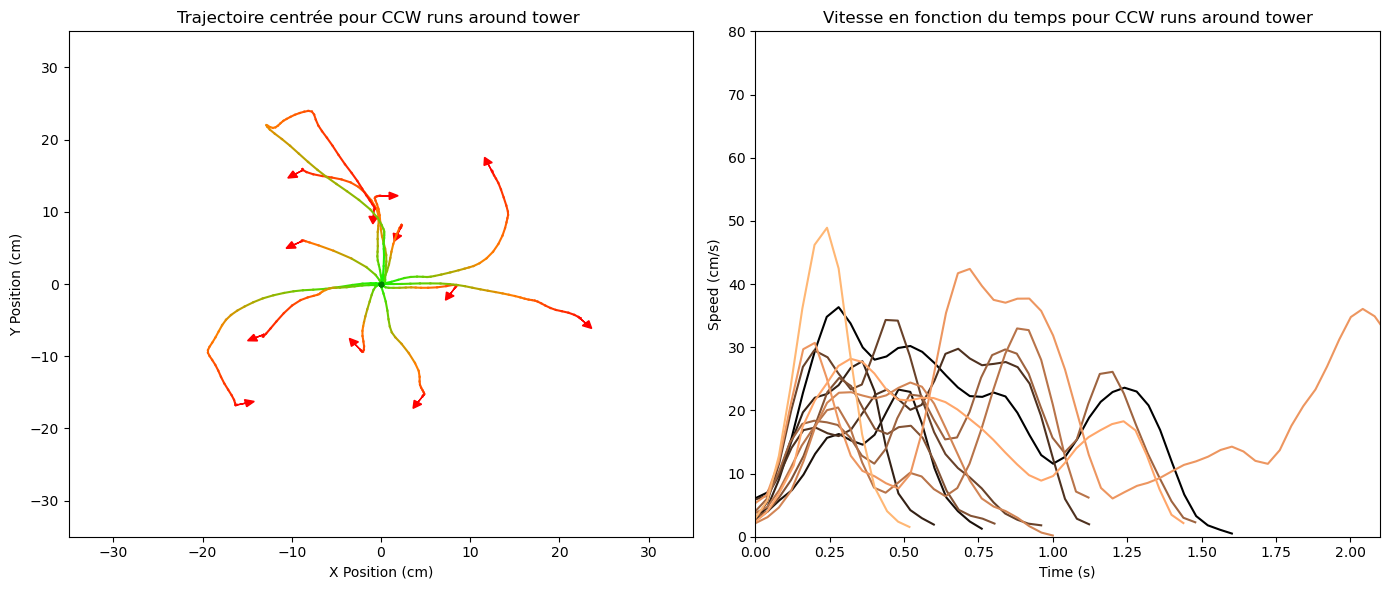

In [27]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

plot_trajectory_type_centered(axs[0], X_positions_cm, Y_positions_cm, runs_around_tower_CCW, title_type='CCW runs around tower ', axis_lim=35)
plot_speed_over_time(axs[1], traject_time, speeds, runs_around_tower_CCW, title_type = 'CCW runs around tower',xlim=2.1)

plt.tight_layout()
plt.show()

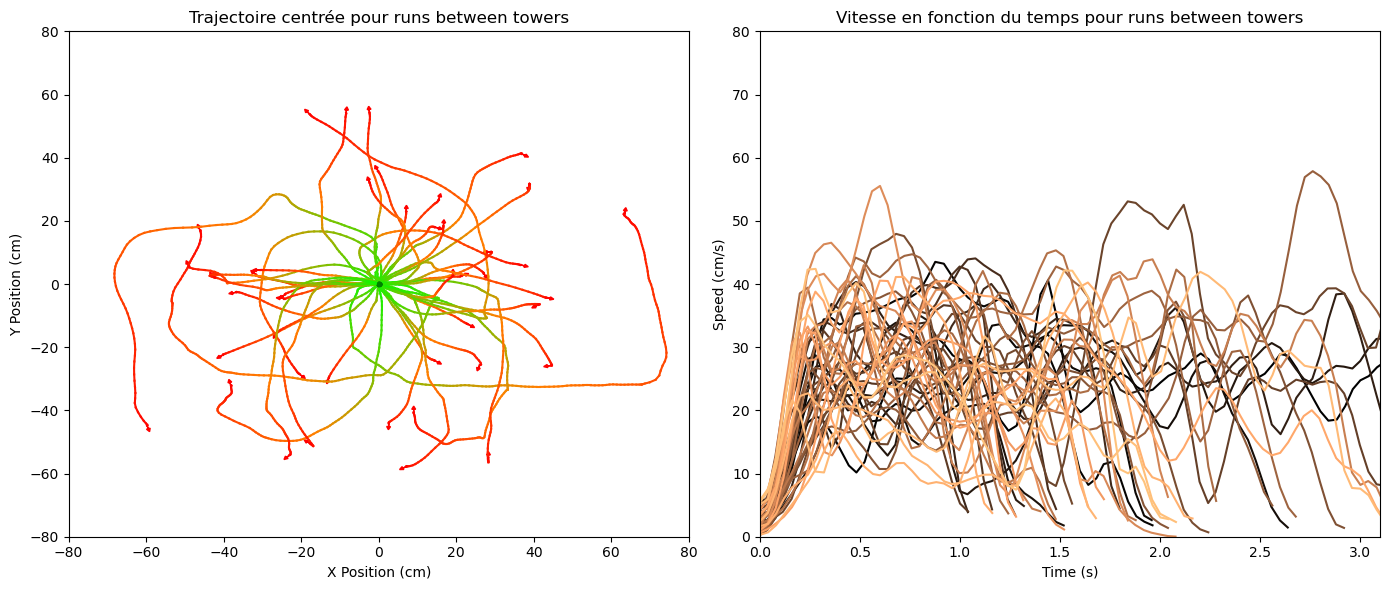

In [28]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

plot_trajectory_type_centered(axs[0], X_positions_cm, Y_positions_cm, runs_between_towers, title_type = 'runs between towers')
plot_speed_over_time(axs[1], traject_time, speeds, runs_between_towers, title_type = 'runs between towers', xlim=3.1)

plt.tight_layout()
plt.show()


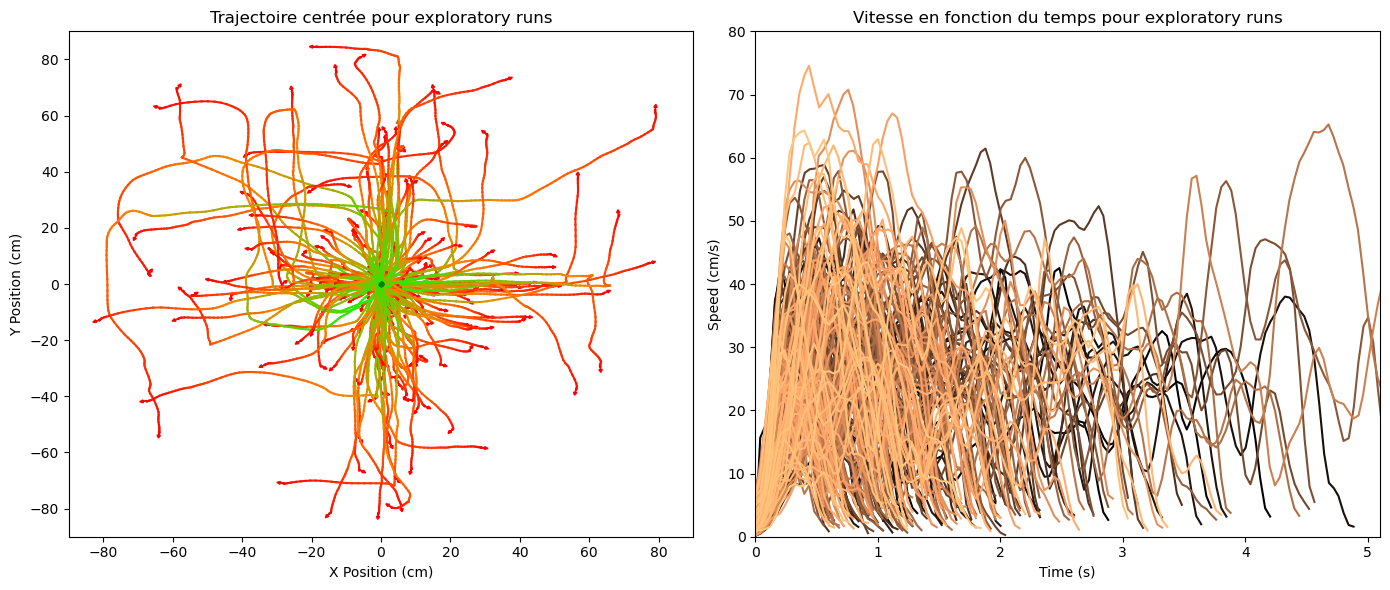

In [29]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

plot_trajectory_type_centered(axs[0], X_positions_cm, Y_positions_cm, exploratory_runs, title_type='exploratory runs', axis_lim=90)
plot_speed_over_time(axs[1], traject_time, speeds, exploratory_runs, title_type = 'exploratory runs')

plt.tight_layout()
plt.show()

In [44]:
print(runs_around_tower[0])
print(X_positions_cm)

[[775, 812], ['NE', 'W'], ['NE', 'N'], {'Rewarded': False, 'direction': 'CW', 'num_trapezeswitch': 1}, {'epoch_time': 46.036, 'epoch_duration': 1.4799999999999969, 'epoch_distance': 29.882937873246007, 'epoch_meanspeed': 20.19117423867978, 'epoch_maxspeed': 33.98805715100728}]
[ 6.80953875  6.94743006  7.07957129 ... 76.89789047 76.94278417
 76.95277095]


In [70]:
print(run_around_tower_results)

{'NE': {'total_CW': 5, 'total_CCW': 5, 'rewarded_CW': 0, 'rewarded_CCW': 0}, 'NW': {'total_CW': 6, 'total_CCW': 1, 'rewarded_CW': 0, 'rewarded_CCW': 1}, 'SE': {'total_CW': 2, 'total_CCW': 4, 'rewarded_CW': 0, 'rewarded_CCW': 0}, 'SW': {'total_CW': 6, 'total_CCW': 2, 'rewarded_CW': 0, 'rewarded_CCW': 0}, 'All': {'total_CW': 19, 'total_CCW': 12, 'rewarded_CW': 0, 'rewarded_CCW': 1}}


In [79]:
# print(run_around_tower_results['NE']['rewarded_CW'])
# print(run_around_tower_results['NE']['rewarded_CCW'])

# total_rewards_NE=run_around_tower_results['NE']['rewarded_CW'] + run_around_tower_results['NE']['rewarded_CCW']
# print(total_rewards_NE)

In [93]:
# total_rewards={}
# total_turns = {}
def plot_maze_towers_with_results(vertices, towers_coordinates, results):
    """
    Plots the edges of a tower or trapeze based on given vertices, 
    and adds behavior data as text inside the plotted shape.
    
    Parameters:
        vertices (list of tuples): List of (x, y) coordinates for the corners of the tower/trapeze.
        color (str): Color code for the plot (e.g., 'r' for red).
        results (dict): Dictionary containing behavioral data with keys 'rewarded_CW', 'total_CW', 
                        'rewarded_CCW', and 'total_CCW'.
        
    """
    for tower_name, vertices in towers_coordinates.items():
        # Fermer le polygone en ajoutant le premier sommet à la fin
        closed_vertices = vertices + [vertices[0]]
        closed_vertices = list(zip(*closed_vertices))  # Transpose vertices for plotting (x, y)
        
        # Calculer le centre du polygone pour afficher le texte au centre
        center_x = sum(v[0] for v in vertices) / len(vertices)
        center_y = sum(v[1] for v in vertices) / len(vertices)

        # Extraire les résultats pour le tour spécifié
        if tower_name in results:
            tower_results = results[tower_name]
            # total_rewards[tower_name] = tower_results['rewarded_CCW'] + tower_results['rewarded_CW']
            # total_turns[tower_name] = tower_results['total_CCW'] + tower_results['total_CW']
            # Texte avec les données comportementales pour le tour
            behavior_text = (f"{tower_name}\n"
                                f"Rewarded/Tot\n"
                                f"CW: {tower_results['rewarded_CW']}/{tower_results['total_CW']}\n"
                                f"CCW: {tower_results['rewarded_CCW']}/{tower_results['total_CCW']}")
            
            # Ajouter le texte au centre du polygone
            plt.text(center_x, center_y, behavior_text, fontsize=8, ha='center', va='center', color='black')
        else:
            print(f"Warning: Tower name '{tower_name}' not found in results.")


Text(0.5, 0.98, 'Trajectoire des runs around towers\nDistance: 654.75 cm ; Duration: 35.95 s ; \nMean speed: 17.79 cm/s ; Max speed: 32.97 cm/s')

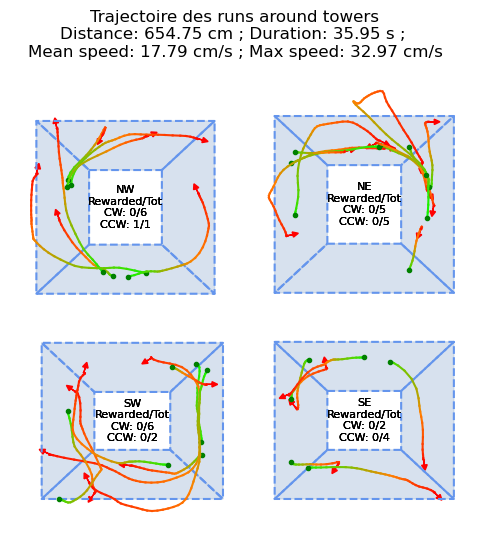

In [94]:
run_label =  'runs around towers' # can be "runs between towers" or "exploratory runs" or "runs around tower"
border_colors = ['cornflowerblue'] * 4 # colors to change
fill_colors = ['lightsteelblue'] * 4 # color to change


fig, ax = plt.subplots(figsize=(6, 6))
for spine in ax.spines.values():
    spine.set_visible(False)
ax.set_xticks([])
ax.set_yticks([])

for i, (tower, trapezes) in enumerate(trapezes_coordinates.items()):
    for j, (trapeze, coordinates) in enumerate(trapezes.items()):
        # Close the polygon by appending the first vertex
        coordinates_copy = coordinates + [coordinates[0]]
        x_coords, y_coords = zip(*coordinates_copy)

        ax.fill(x_coords, y_coords, color=fill_colors[j % len(fill_colors)], alpha=0.5)
        
        # Plot trapeze borders
        ax.plot(x_coords, y_coords, color=border_colors[j % len(border_colors)], linestyle='--')

total_time = 0
total_distance = 0
meanspeed = []
maxspeed = []
q=4

for run in runs_around_tower:
    start_index, end_index = run[0][0], run[0][1]

    # Extract the run epoch, compute duration, distance and speed
    run_X_position = X_positions_cm[start_index:end_index + 1]
    run_Y_position = Y_positions_cm[start_index:end_index + 1]
    run_duration = traject_time[end_index] - traject_time[start_index]
    total_time += run_duration
    distance_ran = np.sum(distances[start_index:end_index])
    total_distance += distance_ran
    meanspeed.append(distance_ran / run_duration)
    maxspeed.append(np.max(speeds[start_index:end_index]))

    numberofpositions=len(run_X_position)
    colorgradientforthisrun = custom_cmap(numberofpositions)

    for k in range(numberofpositions - 1):
        ax.plot(run_X_position[k:k+2], run_Y_position[k:k+2], linestyle='-', label=f"Traj {start_index}-{end_index}", color=colorgradientforthisrun[k])

    # Plot the start and end points
    ax.plot(run_X_position[0], run_Y_position[0], 'go', markersize=3)  # Start point

    if len(run_X_position) >= q:
        dx = run_X_position[-1] - run_X_position[-q]
        dy = run_Y_position[-1] - run_Y_position[-q]
        
        # Normalize the direction
        norm = np.hypot(dx, dy)
        if norm != 0:
            dx /= norm
            dy /= norm
        
        # Plot the arrow
        ax.arrow(run_X_position[-1], run_Y_position[-1], dx, dy,
                    head_width=1, head_length=1, fc='red', ec='red')
        
if run_label == 'runs around towers':
    for tower_name, vertices in towers_coordinates.items():
        plot_maze_towers_with_results(vertices, towers_coordinates, run_around_tower_results)
    

# ax.set_title(f"{runs_around_tower} (Tot. Duration: {total_time:.2f}s; Tot. Distance: {total_distance:.2f}cm; \nMean speed: {np.median(meanspeed):.2f}cm/s; Max speed: {np.median(maxspeed):.2f}cm/s)", fontsize=5)
text = f"Trajectoire des {run_label}\nDistance: {total_distance:.2f} cm ; Duration: {total_time:.2f} s ; \nMean speed: {np.median(meanspeed):.2f} cm/s ; Max speed: {np.median(maxspeed):.2f} cm/s"
fig.suptitle(text, fontsize=12)



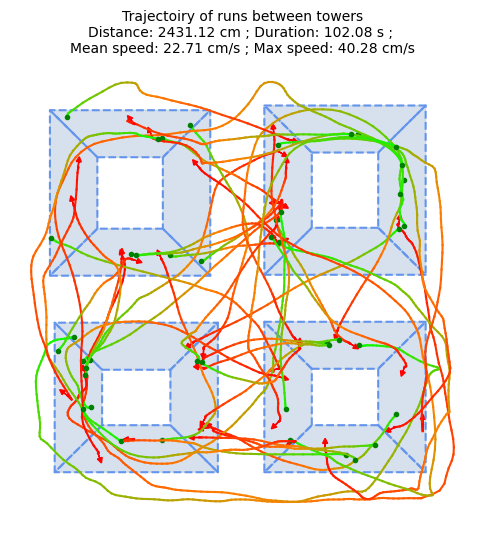

In [100]:
def plot_run_trajectories(ax, trapezes_coordinates, run_type, traject_time, distances, 
                          X_positions_cm, Y_positions_cm, speeds, towers_coordinates, run_label='Undefined run label', q=4):
    """
    Plots run trajectories around towers, including towers and behavioral data.

    Parameters:
        ax (matplotlib.axes.Axes): Matplotlib Axes on which to plot.
        run_label (str): Label describing the type of runs (e.g., "runs around towers").
        q (int): Minimum number of points to compute and display direction arrows.
        trapezes_coordinates (dict): Coordinates of trapezoidal regions for each tower.
        run_type (list of tuples): List of runs, where each run is represented as [(start, end), ...].
        traject_time (list): Time values corresponding to the trajectory points.
        distances (list): Distance values for each point in the trajectory.
        X_positions_cm (list): X-coordinates of positions in the trajectory.
        Y_positions_cm (list): Y-coordinates of positions in the trajectory.
        speeds (list): Speed values at each point in the trajectory.
        towers_coordinates (dict): Dictionary with tower names as keys and coordinates for each tower as values.
    """
    # Colors for plotting
    border_colors = ['cornflowerblue'] * 4
    fill_colors = ['lightsteelblue'] * 4

    # Remove spines and ticks from the plot
    for spine in ax.spines.values():
        spine.set_visible(False)
    ax.set_xticks([])
    ax.set_yticks([])

    # Plot each trapezoid region with colors and borders
    for i, (tower, trapezes) in enumerate(trapezes_coordinates.items()):
        for j, (trapeze, coordinates) in enumerate(trapezes.items()):
            coordinates_copy = coordinates + [coordinates[0]]
            x_coords, y_coords = zip(*coordinates_copy)
            ax.fill(x_coords, y_coords, color=fill_colors[j % len(fill_colors)], alpha=0.5)
            ax.plot(x_coords, y_coords, color=border_colors[j % len(border_colors)], linestyle='--')

    # Initialize counters and lists for run analysis
    total_time = 0
    total_distance = 0
    meanspeed = []
    maxspeed = []

    # Plot each run trajectory
    for run in run_type:
        start_index, end_index = run[0][0], run[0][1]
        run_X_position = X_positions_cm[start_index:end_index + 1]
        run_Y_position = Y_positions_cm[start_index:end_index + 1]
        run_duration = traject_time[end_index] - traject_time[start_index]
        distance_ran = np.sum(distances[start_index:end_index])

        # Accumulate metrics
        total_time += run_duration
        total_distance += distance_ran
        meanspeed.append(distance_ran / run_duration)
        maxspeed.append(np.max(speeds[start_index:end_index]))

        # Plot run trajectory with gradient color
        numberofpositions = len(run_X_position)
        colorgradientforthisrun = custom_cmap(numberofpositions)
        for k in range(numberofpositions - 1):
            ax.plot(run_X_position[k:k+2], run_Y_position[k:k+2], linestyle='-', 
                    color=colorgradientforthisrun[k])

        # Plot start point of the run
        ax.plot(run_X_position[0], run_Y_position[0], 'go', markersize=3)

        # Plot arrow if the trajectory has enough points
        if len(run_X_position) >= q:
            dx = run_X_position[-1] - run_X_position[-q]
            dy = run_Y_position[-1] - run_Y_position[-q]
            norm = np.hypot(dx, dy)
            if norm != 0:
                dx /= norm
                dy /= norm
            ax.arrow(run_X_position[-1], run_Y_position[-1], dx, dy, 
                     head_width=1, head_length=1, fc='red', ec='red')

    # Plot towers with results if specified
    if run_label == 'runs around towers':
        plot_maze_towers_with_results(towers_coordinates, towers_coordinates, run_around_tower_results)

    # Set the main title with computed metrics
    text = (f"Trajectoiry of {run_label}\n"
            f"Distance: {total_distance:.2f} cm ; Duration: {total_time:.2f} s\n"
            f"Mean speed: {np.median(meanspeed):.2f} cm/s ; Max speed: {np.median(maxspeed):.2f} cm/s")
    ax.set_title(text, fontsize=10)

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
plot_run_trajectories(ax, trapezes_coordinates, runs_between_towers, traject_time, distances, 
                          X_positions_cm, Y_positions_cm, speeds, towers_coordinates, run_label='runs between towers', q=4)

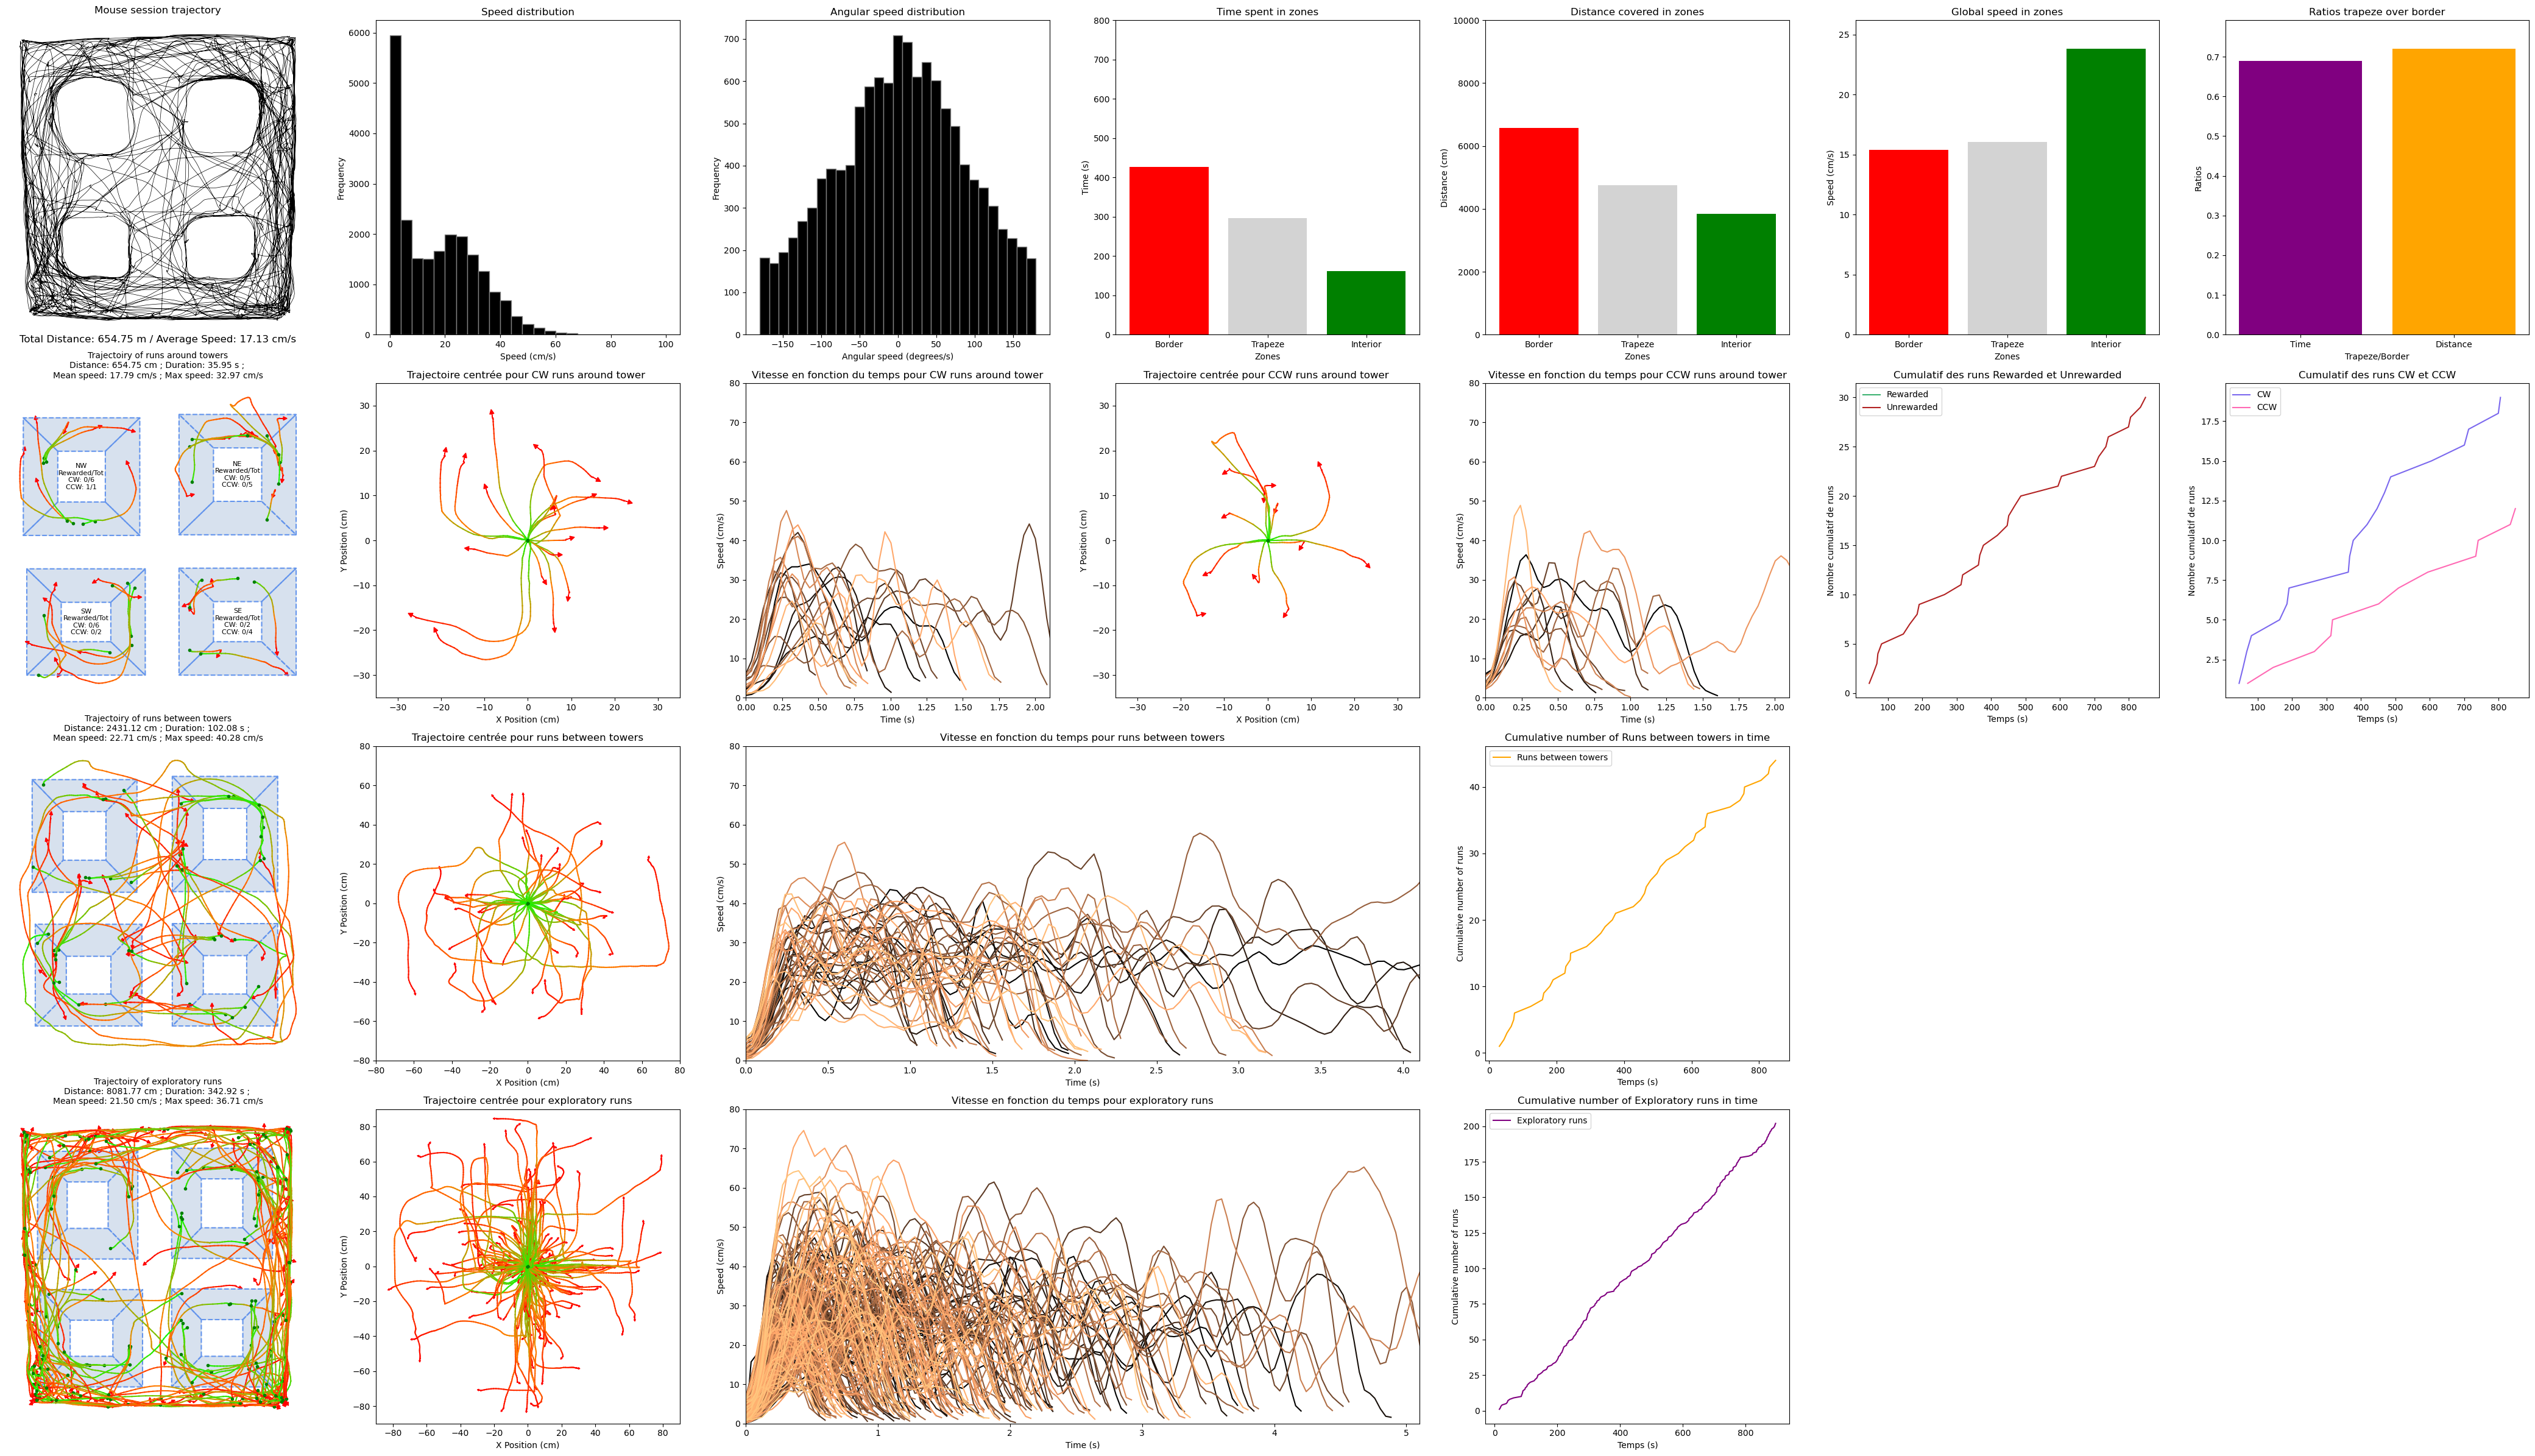

In [103]:
def generate_session_figure(fig, n_rows, n_cols):# Creation of the grid
    # Dimensions de chaque carré
    # Utilisation de GridSpec pour une grille flexible
    gs = GridSpec(n_rows, n_cols, figure=fig)

    # Insertion des graphiques dans la grille
    # Trajectoire dans la case de la colonne 2 et ligne 3
    ax_trajectory = fig.add_subplot(gs[2, 1])  # Ligne 3, colonne 2
    plot_trajectory_type_centered(ax_trajectory, X_positions_cm, Y_positions_cm, runs_between_towers, title_type='runs between towers')

    # Profil de vitesse dans les colonnes 3-4 et ligne 3
    ax_speed = fig.add_subplot(gs[2, 2:4])  # Ligne 3, colonnes 3 et 4 (combinées)
    plot_speed_over_time(ax_speed, traject_time, speeds, runs_between_towers, title_type='runs between towers', xlim=4.1)

    # Trajectoire dans la colonne 2, ligne 4
    ax_trajectory = fig.add_subplot(gs[3, 1])  # Ligne 4, colonne 2
    plot_trajectory_type_centered(ax_trajectory, X_positions_cm, Y_positions_cm, exploratory_runs, title_type='exploratory runs', axis_lim=90)

    # Profil de vitesse dans les colonnes 3-4 et ligne 4
    ax_speed = fig.add_subplot(gs[3, 2:4])  # Ligne 4, colonnes 3 et 4 (combinées)
    plot_speed_over_time(ax_speed, traject_time, speeds, exploratory_runs, title_type='exploratory runs')

    # Tracé des métriques dans les colonnes 4, 5, 6 et des ratios dans la colonne 7 de la première ligne
    # Metrics - Temps
    ax_time = fig.add_subplot(gs[0, 3])
    plot_metrics_in_zones(ax_time, time_zones_data, metric_title='Time spent in zones', ylabel='Time (s)', ymax=800)

    # Metrics - Distance
    ax_distance = fig.add_subplot(gs[0, 4])
    plot_metrics_in_zones(ax_distance, distance_zones_data, metric_title='Distance covered in zones', ylabel='Distance (cm)', ymax=10000)

    # Metrics - Vitesse
    ax_speed = fig.add_subplot(gs[0, 5])
    plot_metrics_in_zones(ax_speed, speed_zones_data, metric_title='Global speed in zones', ylabel='Speed (cm/s)', ymax=None)

    # Ratios - Trapeze sur Bordure
    ax_ratios = fig.add_subplot(gs[0, 6])
    plot_ratios_in_zones(ax_ratios, ratios_trapeze_over_border, title_ratio='Ratios trapeze over border', xlabel='Trapeze/Border', ymax=None)

    # Colonne 1 : plot_trajectory
    ax_trajectory = fig.add_subplot(gs[0, 0])  # Ligne 1, colonne 1
    plot_trajectory(ax_trajectory, X_positions_cm, Y_positions_cm, total_distance, average_speed)

    # Colonne 2 : plot_speed_distribution
    ax_speed_distribution = fig.add_subplot(gs[0, 1])  # Ligne 1, colonne 2
    plot_speed_distribution(ax_speed_distribution, speeds)

    # Colonne 3 : plot_angular_speed_distribution
    ax_angular_speed_distribution = fig.add_subplot(gs[0, 2])  # Ligne 1, colonne 3
    plot_angular_speed_distribution(ax_angular_speed_distribution, angular_speeds)

    # Ligne 2 colonnes 2 et 3 : plot trajectory and speeds of CW turns
    ax_CW_QT_trajectories = fig.add_subplot(gs[1,1])
    plot_trajectory_type_centered(ax_CW_QT_trajectories, X_positions_cm, Y_positions_cm, runs_around_tower_CW, title_type='CW runs around tower ', axis_lim=35)

    ax_CW_QT_speeds = fig.add_subplot(gs[1,2])
    plot_speed_over_time(ax_CW_QT_speeds, traject_time, speeds, runs_around_tower_CW, title_type = 'CW runs around tower',xlim=2.1)

    # Ligne 2 colonnes 4 et 5 : plot trajectory and speeds of CCW turns
    ax_CCW_QT_trajectories = fig.add_subplot(gs[1,3])
    plot_trajectory_type_centered(ax_CCW_QT_trajectories, X_positions_cm, Y_positions_cm, runs_around_tower_CCW, title_type='CCW runs around tower ', axis_lim=35)

    ax_CCW_QT_speeds = fig.add_subplot(gs[1,4])
    plot_speed_over_time(ax_CCW_QT_speeds, traject_time, speeds, runs_around_tower_CCW, title_type = 'CCW runs around tower',xlim=2.1)

    # Ligne 3 colone 5 : cumulative number of runs between towers
    ax_cumul_nb_of_BT = fig.add_subplot(gs[2,4])
    plot_cumulative_runs(ax_cumul_nb_of_BT, runs_between_towers, legend_label='Runs between towers', color='orange', ymax=None)

    #Ligne 4 colonne 5 : cumulative number of exploratory runs
    ax_cumul_nb_of_ER = fig.add_subplot(gs[3,4])
    plot_cumulative_runs(ax_cumul_nb_of_ER, exploratory_runs, legend_label='Exploratory runs', color='purple', ymax=None)

    #Ligne 2 colonnes 6 et 7 : cumulative number of CCW/CW and rewarded/unrewarded
    ax_cumul_CW_CCW = fig.add_subplot(gs[1,5])
    plot_cumulative_rewarded_unrewarded(ax_cumul_CW_CCW, runs_around_tower)

    ax_cumul_rewarded_unrewarded = fig.add_subplot(gs[1,6])
    plot_cumulative_CW_CCW(ax_cumul_rewarded_unrewarded, runs_around_tower)

    # Colonne 1 lignes 2, 3 et 4 : trajectories of runs by type
    ax_traj_QT = fig.add_subplot(gs[1,0])
    plot_run_trajectories(ax_traj_QT, trapezes_coordinates, runs_around_tower, traject_time, distances, 
                            X_positions_cm, Y_positions_cm, speeds, towers_coordinates, run_label='runs around towers', q=4)

    ax_traj_BT = fig.add_subplot(gs[2,0])
    plot_run_trajectories(ax_traj_BT, trapezes_coordinates, runs_between_towers, traject_time, distances, 
                            X_positions_cm, Y_positions_cm, speeds, towers_coordinates, run_label='runs between towers', q=4)

    ax_traj_ER = fig.add_subplot(gs[3,0])
    plot_run_trajectories(ax_traj_ER, trapezes_coordinates, exploratory_runs, traject_time, distances, 
                            X_positions_cm, Y_positions_cm, speeds, towers_coordinates, run_label='exploratory runs', q=4)


# Taille totale de la figure
square_size = 6
n_cols = 7
n_rows = 4
figsize = (n_cols * square_size, n_rows * square_size)
# Création de la figure
fig = plt.figure(figsize=figsize)
generate_session_figure(fig, n_rows, n_cols)

# Espacement entre les sous-graphes
plt.tight_layout()
plt.show()
